<a href="https://www.kaggle.com/code/singhayush16/project-mielage-prediction?scriptVersionId=140710305" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **Mielage Prediction - Regression Analysis**

-------------

## **Objective**

**Predict the fuel consimption in miles per gallons (mpg).**

## **Data Source**

This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University. The dataset was used in the 1983 American Statistical Association Exposition.

## **Import Library**

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## **Import Data**

In [2]:
df=pd.read_csv('https://github.com/YBIFoundation/Dataset/raw/main/MPG.csv')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


## **Describe Data**

**Attribute Information:**
1. mpg: continuous
2. cylinders: multi-valued discrete
3. displacement: continuous
4. horsepower: continuous
5. weight: continuous
6. acceleration: continuous
7. model_year: multi-valued discrete
8. origin: multi-valued discrete
9. name: string(unique for each instance)

## **Data Visualization**

In [3]:
import warnings
warnings.filterwarnings("ignore", message="The figure layout has changed to tight")

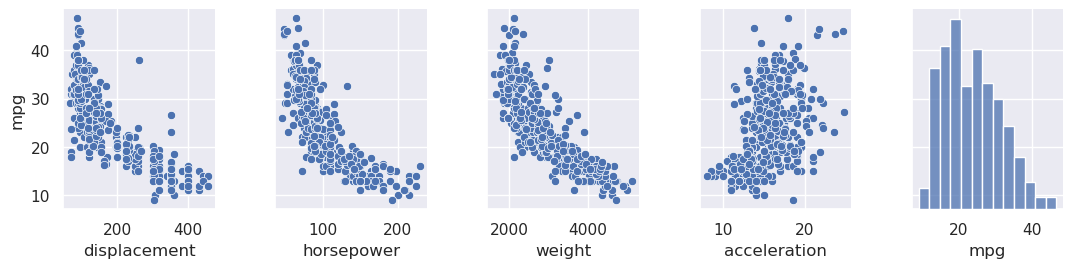

In [4]:
sns.set()
sns.pairplot(data=df,x_vars=['displacement','horsepower','weight','acceleration','mpg'],y_vars='mpg')
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.4, hspace=0.4)
plt.show()

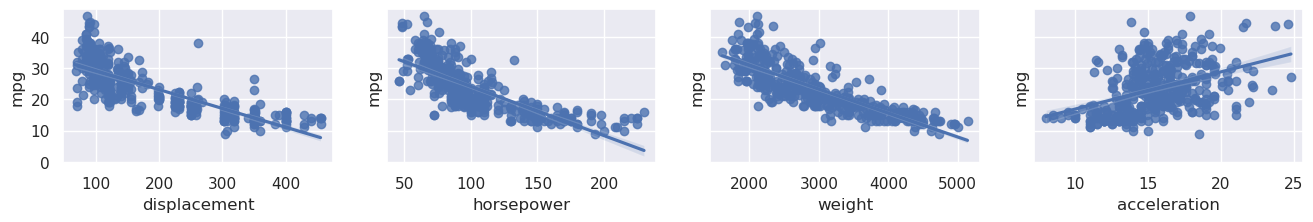

In [5]:
fig,axes=plt.subplots(1,4,sharey=True,figsize=(16,2))
sns.regplot(ax=axes[0],y='mpg',x='displacement',data=df)
sns.regplot(ax=axes[1],y='mpg',x='horsepower',data=df)
sns.regplot(ax=axes[2],y='mpg',x='weight',data=df)
sns.regplot(ax=axes[3],y='mpg',x='acceleration',data=df)
plt.show()

## **Data Preprocessing**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [7]:
df.nunique()

mpg             129
cylinders         5
displacement     82
horsepower       93
weight          351
acceleration     95
model_year       13
origin            3
name            305
dtype: int64

In [8]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [9]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [10]:
df.horsepower.interpolate(inplace=True)

In [11]:
df.drop(['origin','name'],axis=1).corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.775396,-0.804203,-0.777285,-0.831741,0.420289,0.579267
cylinders,-0.775396,1.000000,0.950721,0.843095,0.896017,-0.505419,-0.348746
displacement,-0.804203,0.950721,1.000000,0.897138,0.932824,-0.543684,-0.370164
horsepower,-0.777285,0.843095,0.897138,1.000000,0.863431,-0.686555,-0.418912
weight,-0.831741,0.896017,0.932824,0.863431,1.000000,-0.417457,-0.306564
acceleration,0.420289,-0.505419,-0.543684,-0.686555,-0.417457,1.000000,0.288137
model_year,0.579267,-0.348746,-0.370164,-0.418912,-0.306564,0.288137,1.000000


## **Define Target Variable (y) and Feature Variables (X)**

In [12]:
y=df['mpg']
X=df[['displacement','horsepower','weight','acceleration']]

In [13]:
X.shape,y.shape

((398, 4), (398,))

In [14]:
X.head()

,displacement,horsepower,weight,acceleration
0,307.0,130.0,3504,12.0
1,350.0,165.0,3693,11.5
2,318.0,150.0,3436,11.0
3,304.0,150.0,3433,12.0
4,302.0,140.0,3449,10.5


## **Train Test Split**

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

In [17]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((318, 4), (80, 4), (318,), (80,))

## **Modeling**

In [18]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [19]:
model.fit(X_train,y_train)

LinearRegression()

## **Model Evaluation**

In [20]:
model.coef_

array([-0.00568079, -0.03913778, -0.00543491,  0.02241071])

In [21]:
model.intercept_

44.65197014136392

**Mielage = 44.6 -0.005*Displacement -0.03*Horsepower -0.005*Weight -0.02*Acceleration + error**

## **Prediction**

In [22]:
y_pred=model.predict(X_test)
y_pred

array([30.22421638, 29.49071359, 29.88540441, 29.82090792, 31.22954716,
       31.16130804, 28.44616924, 17.15152543, 31.25959714, 27.79962299,
       26.7236384 , 29.64989184, 31.18504002, 24.85213467, 25.943616  ,
       24.62502884, 24.811705  , 14.52053517, 10.20108504, 27.41641612,
       21.81678601, 10.95073883, 31.04392728, 21.54771017, 24.8362872 ,
       26.46236157, 25.05189818, 23.05846194, 26.44080818, 27.02859523,
       16.39256666, 10.00068553, 29.13608258, 11.63341314, 31.96151999,
       26.72873152, 30.65452693, 15.85709435, 22.23187183, 13.05396984,
       31.06971088, 25.9041874 , 17.35508266, 21.89763609, 30.87909487,
       32.19681128, 20.44812518, 11.71090807, 25.81068887, 16.2811988 ,
       22.67175314, 20.99442049, 24.11872352, 21.90575777, 30.74105662,
       31.21914861, 20.32833891, 15.93155134, 30.88604919, 28.04876347,
       28.86473522, 23.96197095, 31.76747416, 17.22988431, 30.59603706,
       16.96527498, 24.45549903, 20.12796643, 16.18181349, 28.42

## **Model Accuracy**

In [23]:
from sklearn.metrics import mean_absolute_percentage_error

In [24]:
model.score(X_test,y_test)

0.6875778339741478

In [25]:
accuracy=1-mean_absolute_percentage_error(y_test,y_pred)
print('Model is',round(accuracy*100),"% accurate.")

Model is 84 % accurate.
